In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [62]:
df = pd.read_csv('concrete_data.csv')

In [63]:
df.head(4)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05


In [64]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [65]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [66]:
# no -ve value but minimum value is 0

In [67]:
x = df.drop(columns = ['Strength'])
y = df['Strength']

In [68]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [69]:
x_train, x_test,  y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [70]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [71]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [72]:
y_pred = lr.predict(x_test)

r2_score(y_test,y_pred)

0.6275531792314851

##### he r2_score is a statistical measure that indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. 
   ##### In simpler terms, it provides a "goodness of fit" measure for a regression model, showing how well the model's predictions align with the actual data, with a score of 1.0 being a perfect fit. 

In [84]:
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring = 'r2'))

np.float64(0.4609940491662864)

In [85]:
# very bad result as ofnow

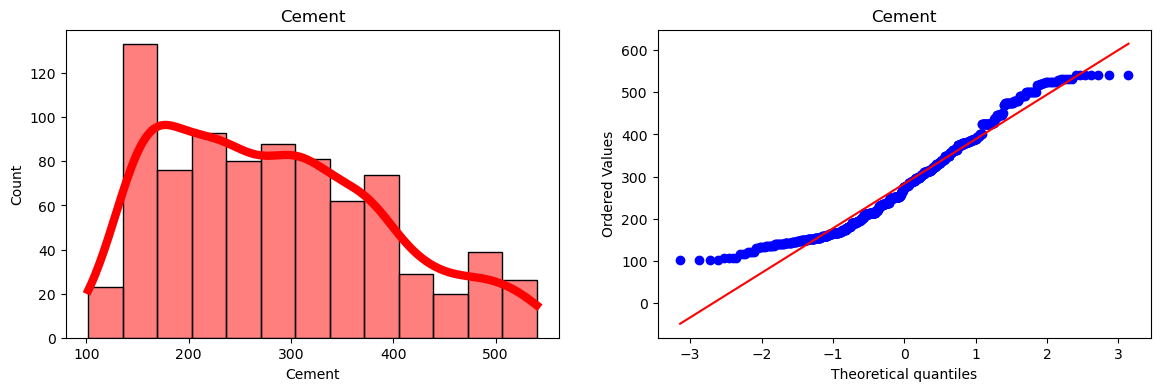

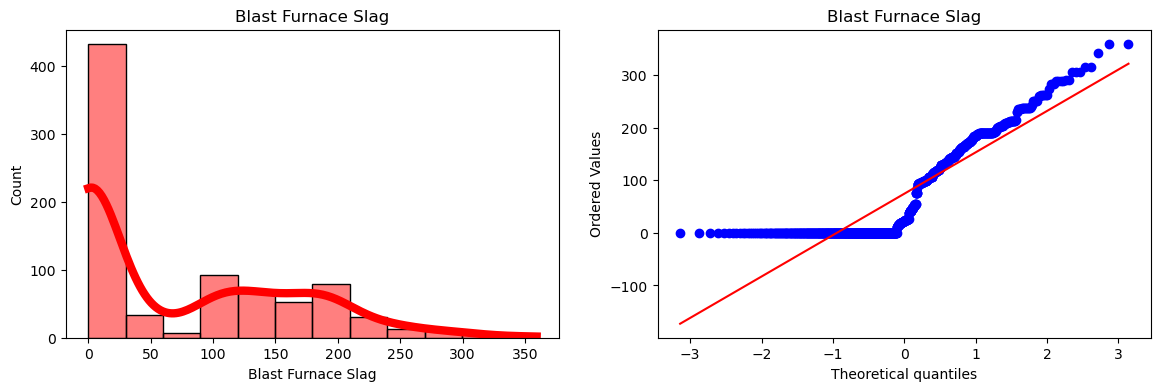

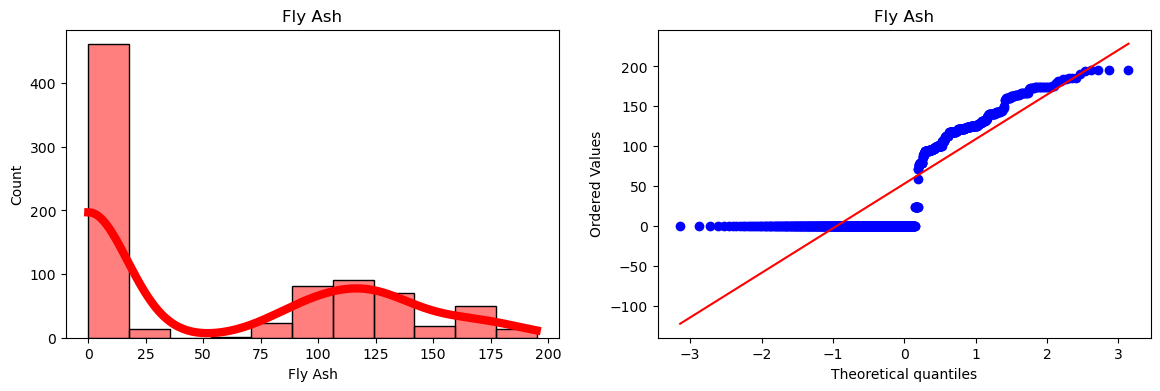

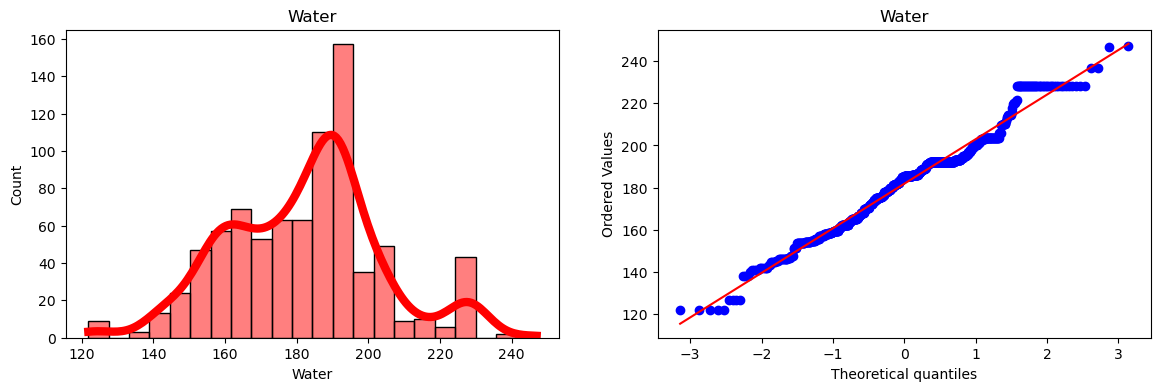

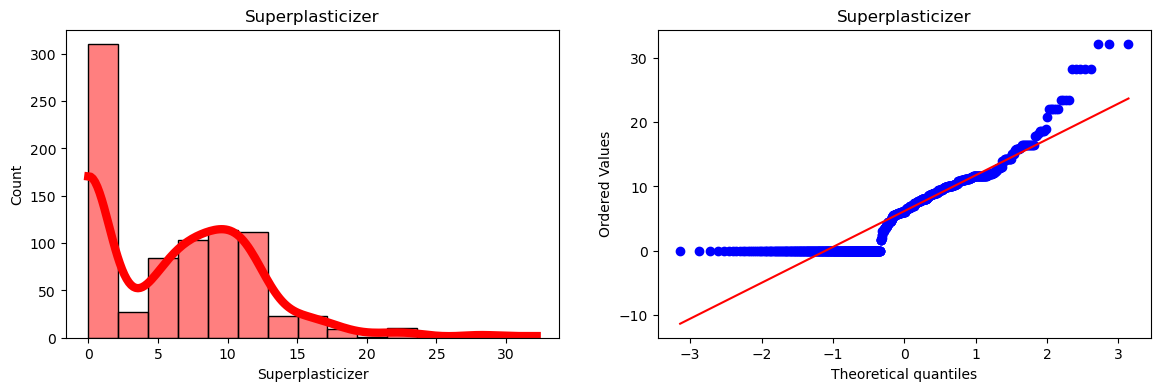

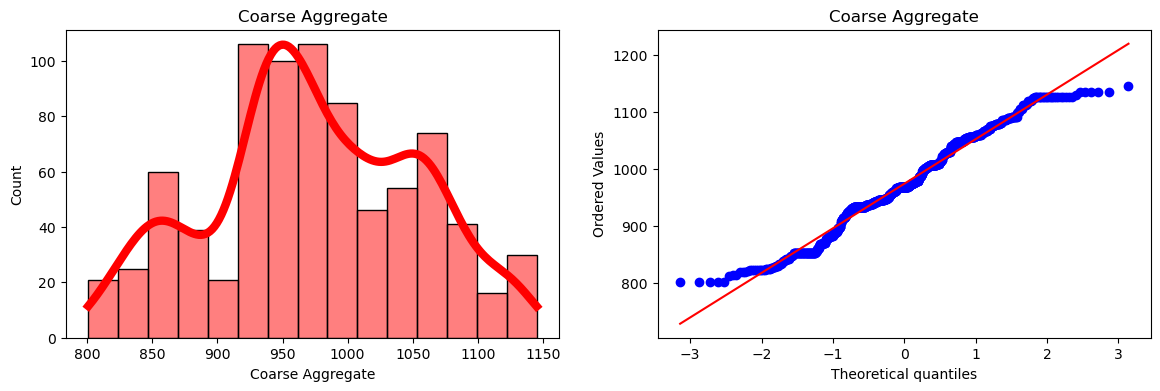

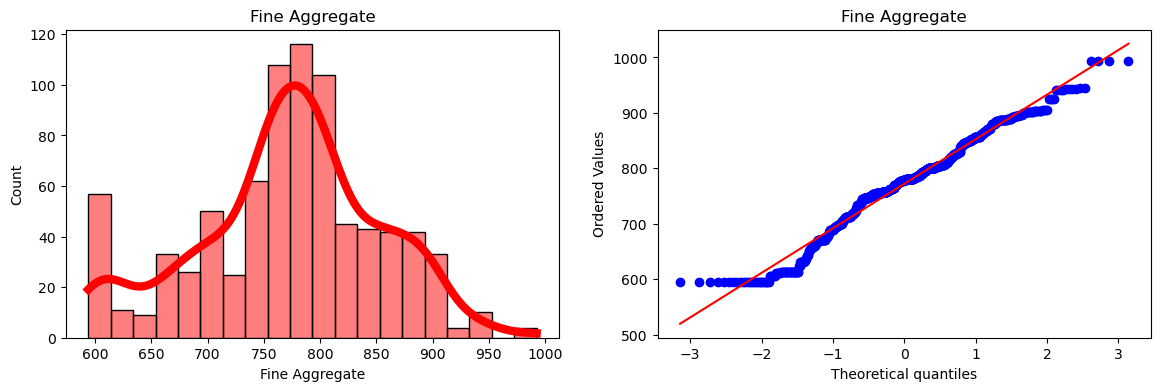

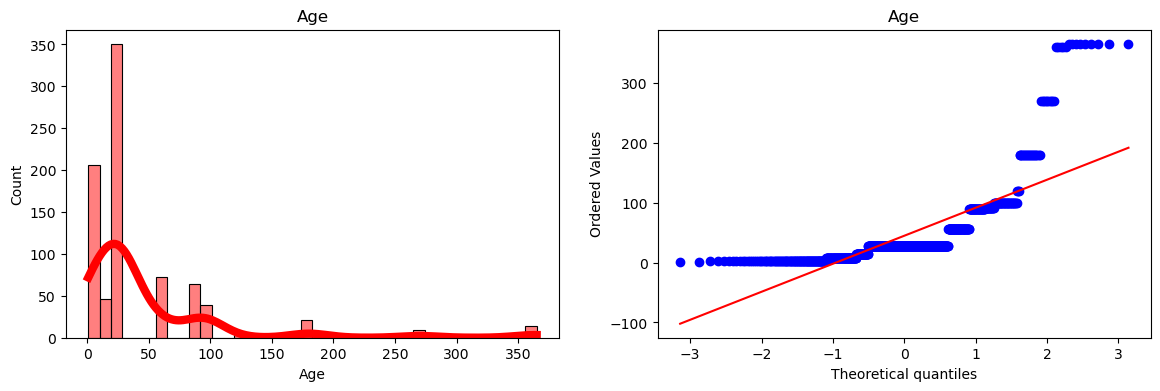

In [86]:
for col in x_train.columns:
    plt.figure(figsize=(14, 4))
    
    # Histogram + KDE
    plt.subplot(121)
    sns.histplot(
        x_train[col],
        kde=True,
        color="red",              # color of histogram bars
        line_kws={"color": "gray", "lw": 6}  # KDE line color & width
    )
    plt.title(col)
    
    # Q-Q plot
    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(col)
    
    plt.show()

In [87]:
# heteroscedasticity
# power transformation maximul likelihook beysion 
# a standard scaler is applied in yeo johnson and box cox methods


In [102]:
PTransform = PowerTransformer(method = 'box-cox')

In [103]:
PTransform

PowerTransformer(method='box-cox')

In [104]:
x_train_transformed = PTransform.fit_transform(x_train + 0.000001)
x_test_transformed = PTransform.fit_transform(x_test + 0.000001)


In [106]:
pd.DataFrame({'cols':x_train.columns, 'box-cox_lambdas':PTransform.lambdas_})


,cols,box-cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [107]:
# these are te lambda values aka the exponents
# suppose cement[i] was 24 then it will be 24^0.215...

In [108]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred2 = lr.predict(x_test_transformed)

r2_score(y_test,y_pred2)

0.8055321004501622

In [109]:
# good result but lets check the mean
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [118]:
np.mean(cross_val_score(lr,x_train_transformed, y_train, scoring = 'r2'))

np.float64(0.79239766193883)

In [119]:
PTransform = PowerTransformer(method = 'box-cox')
X_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6658537941434356)

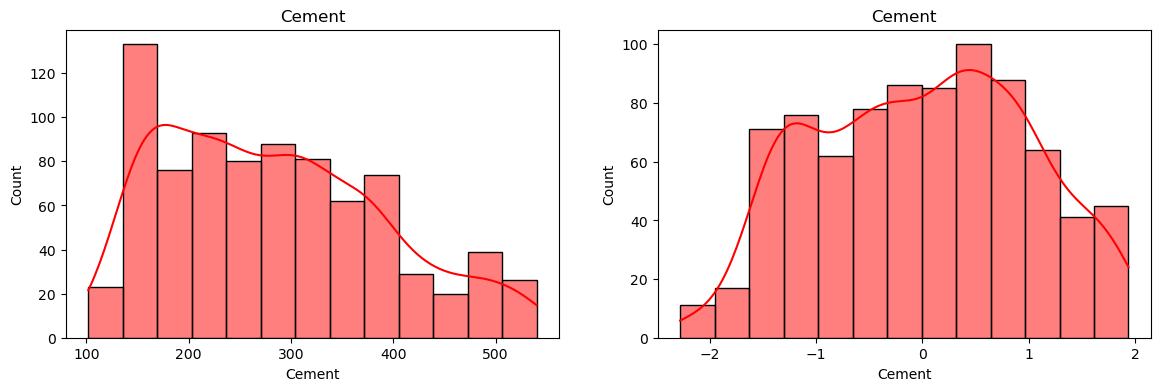

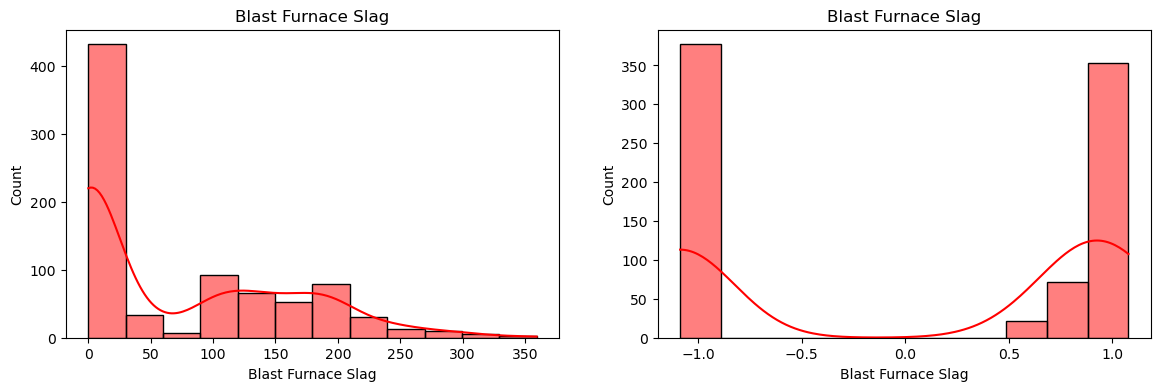

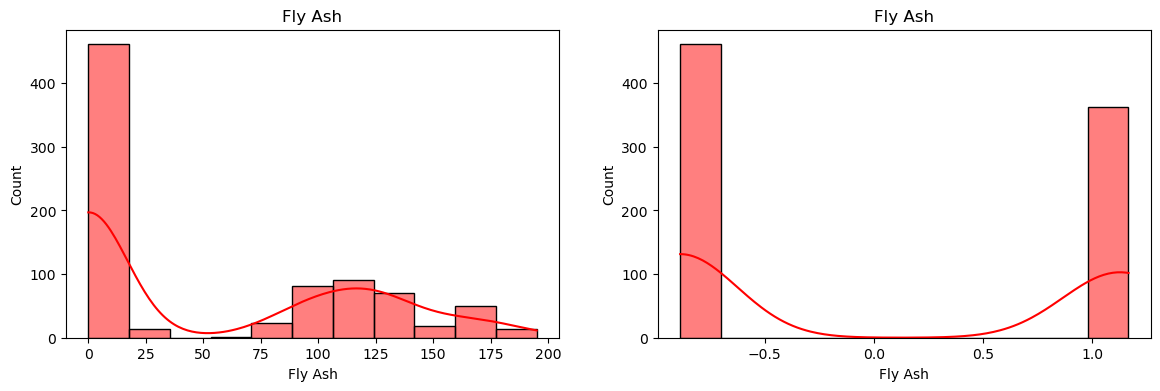

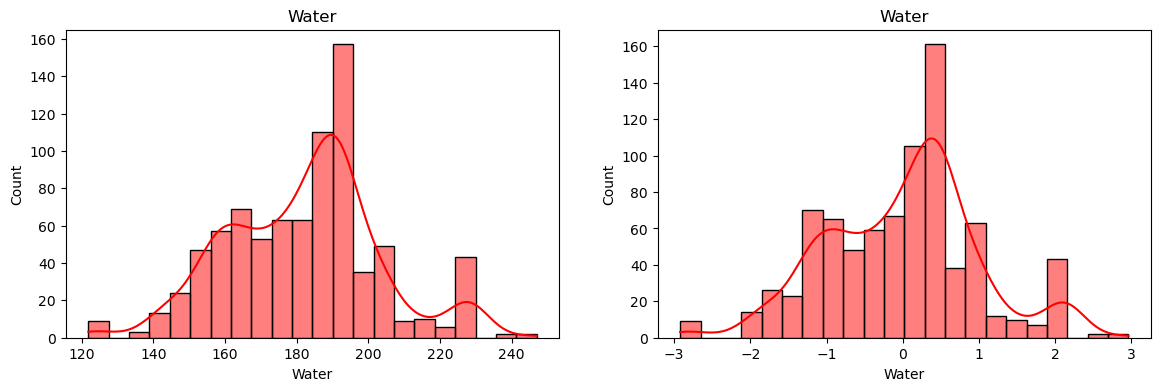

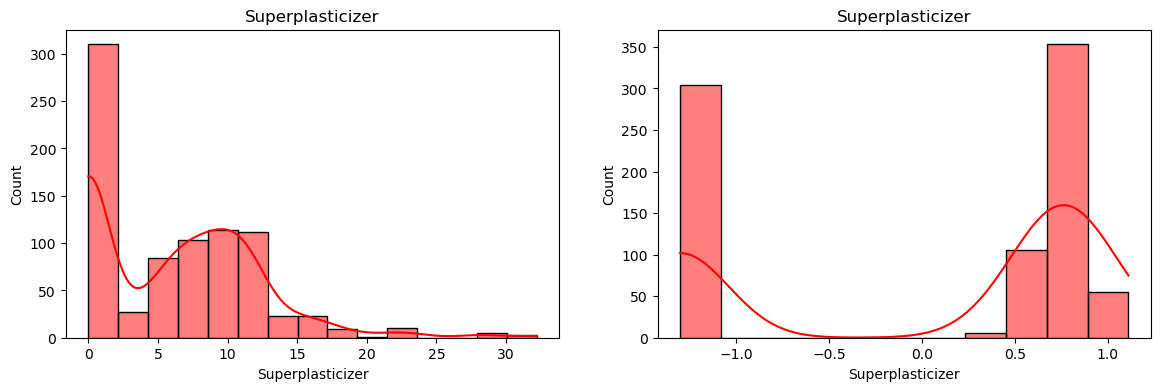

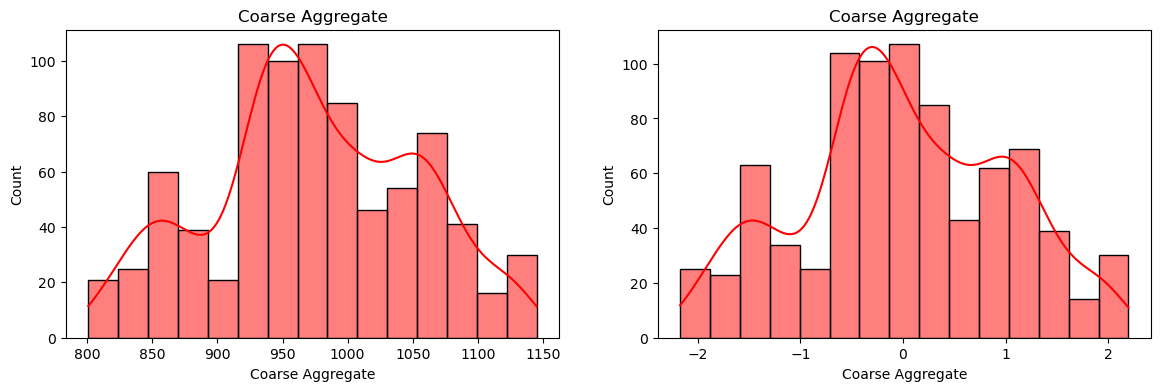

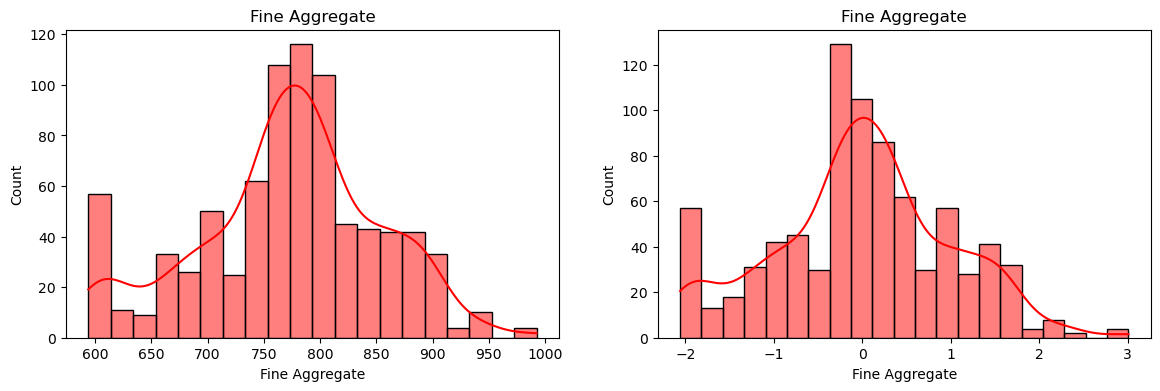

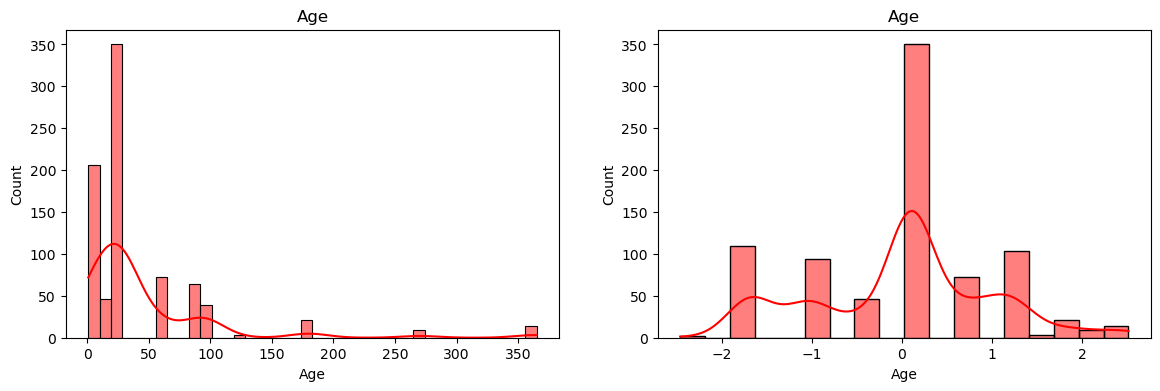

In [123]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns = x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde = True, color = "red")
    plt.title(col)
    plt.subplot(122)
    sns.histplot(x_train_transformed[col], kde = True, color = "red")
    plt.title(col)
    plt.show()
    

In [129]:
YeoJohnson = PowerTransformer()
# by dafault it is yeo johnosn

x_train_transformed2 = YeoJohnson.fit_transform(x_train)
x_test_transformed2 = YeoJohnson.fit_transform(x_test)


In [130]:
lr = LinearRegression()
lr.fit(x_train_transformed2, y_train)
y_pred3 = lr.predict(x_test_transformed2)

print(r2_score(y_test,y_pred3))


0.8153845514638945


In [133]:
pd.DataFrame({'cols':x_train.columns, 'Yeo_Johnson_lambdas': YeoJohnson.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [134]:
# these are the values of lamda for yeo johnson model